In [ ]:
text_corp = ["The future king is the prince",
             "Daughter is the princess",
              "Son is the prince",
              "Only a man can be a king",
              "Only a woman can be a queen",
              "The princess will be a queen",
              "Queen and king rule the realm",
              "The prince is a strong man",
              "The princess is a beautiful woman",
              "The royal family is the king and queen and their children",
              "Prince is only a boy now",
              "A boy will be a man"]

In [ ]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stop = set(stopwords.words("english"))

clean_text_corp = []
# data = [] - wrong place to initialise


for s in text_corp:
  word = word_tokenize(s)
  data = []
  # The below loop runs for all words in 1 sentence.
  for w in word:
    # data = [] - wrong place to initialise as when loop runs for all words in 1 sentence, each time new list will be created-pointless
    if w.lower() not in stop:
      data.append(w.lower())
  clean_str = " ".join(data)
  clean_text_corp.append(clean_str)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_corp

['future king prince',
 'daughter princess',
 'son prince',
 'man king',
 'woman queen',
 'princess queen',
 'queen king rule realm',
 'prince strong man',
 'princess beautiful woman',
 'royal family king queen children',
 'prince boy',
 'boy man']

In [ ]:
# Create focus words and context words : (The future), (The, king); keeping window size of the context = 2

import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

data = []
for sentence in clean_text_corp:
  words = []
  words = word_tokenize(sentence)
  for i in range(len(words)):
    for w in range(1,3):
      if i+w < len(words):
        data.append((words[i], words[i+w]))
      if i-w >= 0:
        data.append((words[i], words[i-w]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(len(data))

56


In [ ]:
data

[('future', 'king'),
 ('future', 'prince'),
 ('king', 'prince'),
 ('king', 'future'),
 ('prince', 'king'),
 ('prince', 'future'),
 ('daughter', 'princess'),
 ('princess', 'daughter'),
 ('son', 'prince'),
 ('prince', 'son'),
 ('man', 'king'),
 ('king', 'man'),
 ('woman', 'queen'),
 ('queen', 'woman'),
 ('princess', 'queen'),
 ('queen', 'princess'),
 ('queen', 'king'),
 ('queen', 'rule'),
 ('king', 'rule'),
 ('king', 'queen'),
 ('king', 'realm'),
 ('rule', 'realm'),
 ('rule', 'king'),
 ('rule', 'queen'),
 ('realm', 'rule'),
 ('realm', 'king'),
 ('prince', 'strong'),
 ('prince', 'man'),
 ('strong', 'man'),
 ('strong', 'prince'),
 ('man', 'strong'),
 ('man', 'prince'),
 ('princess', 'beautiful'),
 ('princess', 'woman'),
 ('beautiful', 'woman'),
 ('beautiful', 'princess'),
 ('woman', 'beautiful'),
 ('woman', 'princess'),
 ('royal', 'family'),
 ('royal', 'king'),
 ('family', 'king'),
 ('family', 'royal'),
 ('family', 'queen'),
 ('king', 'queen'),
 ('king', 'family'),
 ('king', 'children'),
 

In [ ]:
# Get all context words from the above word-context pairs.
# for ind, words in enumerate(data):
#   print(data[ind][1])

# ALTERNATE METHOD
# for i in range(len(data)):
#   print(data[i][1])
#   i+=1


In [ ]:
words = []
for sents in clean_text_corp:
  words.extend(word_tokenize(sents))

unique_words = list(set(words))
unique_words.sort()

uni_dict = {}
i = 0
for w in unique_words:
  uni_dict[w] = i
  i+=1

# ALTERNATE METHODS -

# for index, word in enumerate(unique_words):
#   uni_dict[word] = index

# for index, word in enumerate(unique_words):
#   uni_dict.update({word:index})

In [ ]:
uni_dict

{'beautiful': 0,
 'boy': 1,
 'children': 2,
 'daughter': 3,
 'family': 4,
 'future': 5,
 'king': 6,
 'man': 7,
 'prince': 8,
 'princess': 9,
 'queen': 10,
 'realm': 11,
 'royal': 12,
 'rule': 13,
 'son': 14,
 'strong': 15,
 'woman': 16}

In [ ]:
focus_word_index = uni_dict.get("king")
focus_word_index

6

In [ ]:
# CREATING THE X AND Y MATRICES

from scipy import sparse
import numpy as np

n_words = len(unique_words)

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for index, word_pairs in enumerate(data):
  focus_word_index = uni_dict.get(data[index][0])
  context_word_index = uni_dict.get(data[index][1])

  # Creating the placeholders
  X_row = np.zeros(n_words)
  Y_row = np.zeros(n_words)

  # One hot encoding the main word
  X_row[focus_word_index] = 1

  # One hot encoding the Y matrix words
  Y_row[context_word_index] = 1

  # Appending to the main matrices
  X.append(X_row)
  Y.append(Y_row)



# Converting the matrices into an array
X = np.asarray(X)
Y = np.asarray(Y)

In [ ]:
X.shape

(56, 17)

In [ ]:
X

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
Y.shape

(56, 17)

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(units=embed_size, activation='linear')(inp)
x = tf.keras.layers.Dense(units=Y.shape[1], activation='softmax')(x)
model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Optimizing the network weights
model.fit(
    x=X,
    y=Y,
    batch_size=16,
    epochs=400
)


# # The input layer
weights = model.get_weights()[0]
# # Evaluating the model on the training data
# train_pred = model.predict(X)
# train_pred_classes = tf.argmax(train_pred, axis=1)
# train_true_classes = tf.argmax(Y, axis=1)
# train_accuracy = accuracy_score(train_true_classes, train_pred_classes)
# print("Training Accuracy:", train_accuracy)


# Obtaining the weights from the neural network.
# These are the so-called word embeddings

# Creating a dictionary to store the embeddings in. The key is a unique word and
# the value is the numeric vector
embedding_dict = {}
for word in words:
    embedding_dict.update({
        word: weights[uni_dict.get(word)]
    })


Epoch 1/400
4/4 [==============================] - 0s 3ms/step - loss: 2.8837
Epoch 2/400
4/4 [==============================] - 0s 3ms/step - loss: 2.8803
Epoch 3/400
4/4 [==============================] - 0s 3ms/step - loss: 2.8775
Epoch 4/400
4/4 [==============================] - 0s 3ms/step - loss: 2.8744
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 2.8716
Epoch 6/400
4/4 [==============================] - 0s 3ms/step - loss: 2.8689
Epoch 7/400
4/4 [==============================] - 0s 3ms/step - loss: 2.8659
Epoch 8/400
4/4 [==============================] - 0s 3ms/step - loss: 2.8633
Epoch 9/400
4/4 [==============================] - 0s 3ms/step - loss: 2.8605
Epoch 10/400
4/4 [==============================] - 0s 3ms/step - loss: 2.8578
Epoch 11/400
4/4 [==============================] - 0s 3ms/step - loss: 2.8551
Epoch 12/400
4/4 [==============================] - 0s 2ms/step - loss: 2.8528
Epoch 13/400
4/4 [==============================] - 0s 2ms/st

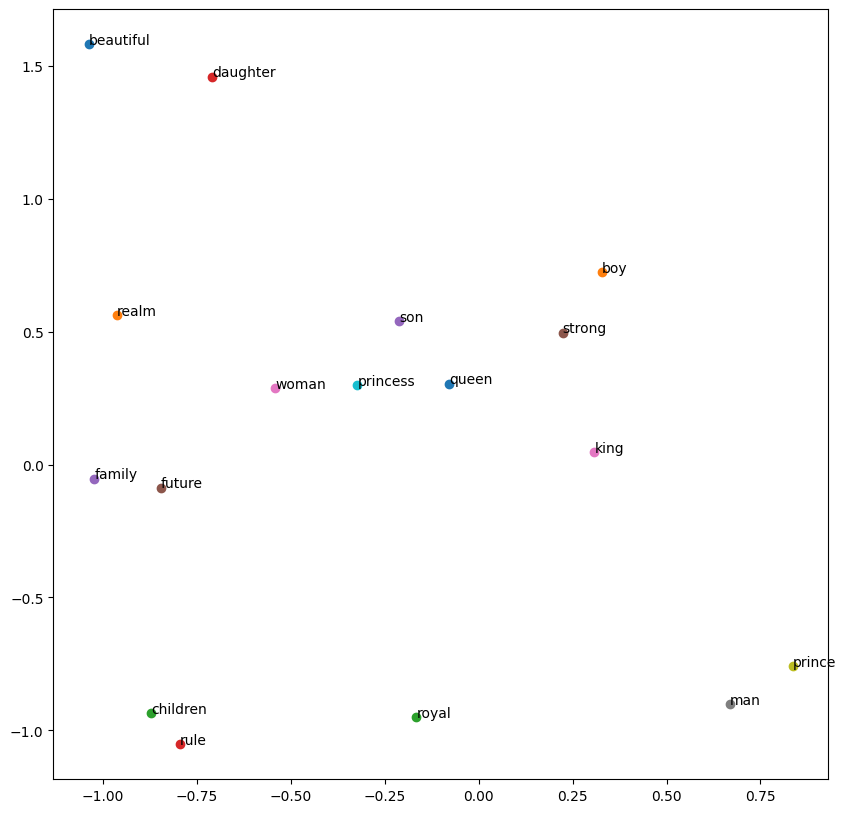

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for word in list(uni_dict.keys()):
  coord = embedding_dict.get(word)
  plt.scatter(coord[0], coord[1])
  plt.annotate(word, (coord[0], coord[1]))

In [ ]:
print(embedding_dict)

{'future': array([0.48499694, 1.1884912 ], dtype=float32), 'king': array([-1.114587  ,  0.32721627], dtype=float32), 'prince': array([0.41653877, 0.57686967], dtype=float32), 'daughter': array([-1.1615334, -1.2818356], dtype=float32), 'princess': array([-0.01722626, -1.0768671 ], dtype=float32), 'son': array([-0.7818832,  1.2320471], dtype=float32), 'man': array([0.8110551, 1.4334618], dtype=float32), 'woman': array([-0.6011234, -1.287383 ], dtype=float32), 'queen': array([-0.00615947, -0.03957615], dtype=float32), 'rule': array([0.5021638 , 0.14639905], dtype=float32), 'realm': array([0.2721872 , 0.49673072], dtype=float32), 'strong': array([-1.1170188,  1.0956159], dtype=float32), 'beautiful': array([-0.49708346, -1.2007594 ], dtype=float32), 'royal': array([ 0.70195574, -0.127252  ], dtype=float32), 'family': array([-0.6171312,  0.821987 ], dtype=float32), 'children': array([-0.37427673,  0.6985063 ], dtype=float32), 'boy': array([-0.5439431,  0.6047394], dtype=float32)}


In [ ]:
print(train_pred)
# Each value in the matrix represents the predicted probability of a context word being associated with a specific word pair.

[[0.00497385 0.09559041 0.0172544  0.00425719 0.0227619  0.02848494
  0.36899447 0.05722459 0.16013207 0.0033616  0.03324767 0.02804885
  0.02492319 0.03584574 0.0188193  0.08601298 0.01006672]
 [0.00497385 0.09559041 0.0172544  0.00425719 0.0227619  0.02848494
  0.36899447 0.05722459 0.16013207 0.0033616  0.03324767 0.02804885
  0.02492319 0.03584574 0.0188193  0.08601298 0.01006672]
 [0.01996451 0.01066947 0.05576166 0.00898413 0.04374866 0.04766361
  0.05793665 0.12418374 0.14215806 0.06243762 0.1993399  0.0242229
  0.07834841 0.06596879 0.01116371 0.01619023 0.03125795]
 [0.01996451 0.01066947 0.05576166 0.00898413 0.04374866 0.04766361
  0.05793665 0.12418374 0.14215806 0.06243762 0.1993399  0.0242229
  0.07834841 0.06596879 0.01116371 0.01619023 0.03125795]
 [0.01541375 0.08387227 0.02691785 0.01225272 0.04005851 0.03661108
  0.28190774 0.06086158 0.12493834 0.01275892 0.05552091 0.04208976
  0.02957906 0.04661307 0.02937771 0.0756096  0.02561704]
 [0.01541375 0.08387227 0.026917

In [ ]:
print(train_pred.shape)

(56, 17)
